In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

## read flyai data for vision task

In [2]:
from learner import *

In [4]:
from pathlib import Path

In [8]:
import pandas as pd

In [5]:
path_root = Path('../vision/StanfordDogs120_FlyAI/')
path_train = path_root/'data/local/train'
path_test = path_root/'data/local/test'
path_train.ls(),path_test.ls()

([PosixPath('../vision/StanfordDogs120_FlyAI/data/local/train/n02113799-standard_poodle'),
  PosixPath('../vision/StanfordDogs120_FlyAI/data/local/train/n02109961-Eskimo_dog'),
  PosixPath('../vision/StanfordDogs120_FlyAI/data/local/train/n02116738-African_hunting_dog'),
  PosixPath('../vision/StanfordDogs120_FlyAI/data/local/train/n02105251-briard'),
  PosixPath('../vision/StanfordDogs120_FlyAI/data/local/train/n02094433-Yorkshire_terrier'),
  PosixPath('../vision/StanfordDogs120_FlyAI/data/local/train/n02111277-Newfoundland'),
  PosixPath('../vision/StanfordDogs120_FlyAI/data/local/train/n02088466-bloodhound'),
  PosixPath('../vision/StanfordDogs120_FlyAI/data/local/train/n02095889-Sealyham_terrier'),
  PosixPath('../vision/StanfordDogs120_FlyAI/data/local/train/n02090721-Irish_wolfhound'),
  PosixPath('../vision/StanfordDogs120_FlyAI/data/local/train/n02109047-Great_Dane'),
  PosixPath('../vision/StanfordDogs120_FlyAI/data/local/train/n02085936-Maltese_dog'),
  PosixPath('../vision/

In [9]:
trn_csv = pd.read_csv(path_train/'train.csv')
val_csv = pd.read_csv(path_test/'test.csv')
trn_csv.head(),val_csv.head()

(                                    image_path  labels  \
 0  n02096437-Dandie_Dinmont/n02096437_1171.jpg      97   
 1    n02091244-Ibizan_hound/n02091244_3552.jpg       3   
 2       n02107142-Doberman/n02107142_13356.jpg      24   
 3      n02088466-bloodhound/n02088466_9576.jpg      94   
 4      n02112018-Pomeranian/n02112018_5738.jpg     114   
 
                        name  
 0  n02096437-Dandie_Dinmont  
 1    n02091244-Ibizan_hound  
 2        n02107142-Doberman  
 3      n02088466-bloodhound  
 4      n02112018-Pomeranian  ,
                                         image_path  labels  \
 0  n02091032-Italian_greyhound/n02091032_10314.jpg      78   
 1            n02110063-malamute/n02110063_9496.jpg      19   
 2     n02097474-Tibetan_terrier/n02097474_1763.jpg      58   
 3     n02106662-German_shepherd/n02106662_3260.jpg      27   
 4  n02099712-Labrador_retriever/n02099712_5000.jpg      79   
 
                            name  
 0   n02091032-Italian_greyhound  
 1     

In [10]:
12348/64

192.9375

In [11]:
defaults.lr

NameError: name 'defaults' is not defined

In [13]:
from data import *

In [15]:
from transform import *

In [16]:
dataset=ImageDataBunch.from_df(path=path_train,df=trn_csv,ds_tfms=get_transforms(),size=224,bs=64,valid_pct=0).normalize(imagenet_stats)
data_val=ImageDataBunch.from_df(path=path_test,df=val_csv,ds_tfms=get_transforms(),size=224,bs=64,valid_pct=0).normalize(imagenet_stats)
dataset.valid_dl= data_val.train_dl
dataset

ImageDataBunch;

Train: LabelList (12348 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
97,3,24,94,114
Path: ../vision/StanfordDogs120_FlyAI/data/local/train;

Valid: LabelList (4116 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
78,19,58,27,79
Path: ../vision/StanfordDogs120_FlyAI/data/local/test;

Test: None

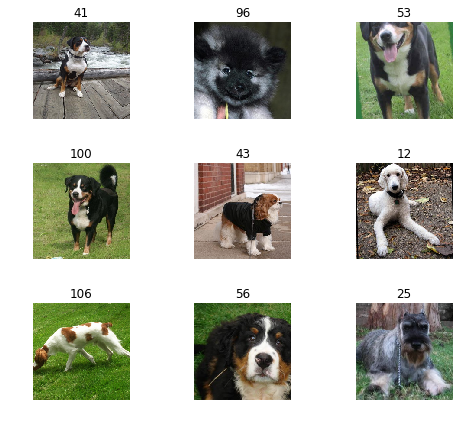

In [18]:
dataset.show_batch(rows=3,figsize=(7,6))

In [20]:
print(dataset.classes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


In [66]:
#acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2, beta = 1)

fastai.metrics.FBeta

In [77]:
@dataclass
class Fbeta_binary(Callback):
    "Computes the fbeta between preds and targets for single-label classification"
    beta2: int = 2
    eps: float = 1e-9
    clas:int=1
    
    def on_epoch_begin(self, **kwargs):
        self.TP = 0
        self.total_y_pred = 0   
        self.total_y_true = 0
    
    def on_batch_end(self, last_output, last_target, **kwargs):
        y_pred = last_output.argmax(dim=1)
        y_true = last_target.float()
        
        self.TP += ((y_pred==self.clas) * (y_true==self.clas)).float().sum()
        self.total_y_pred += (y_pred==self.clas).float().sum()
        self.total_y_true += (y_true==self.clas).float().sum()
    
    def on_epoch_end(self, **kwargs):
        beta2=self.beta2**2
        prec = self.TP/(self.total_y_pred+self.eps)
        rec = self.TP/(self.total_y_true+self.eps)       
        res = (prec*rec)/(prec*beta2+rec+self.eps)*(1+beta2)
        self.metric = res

In [23]:
from torchvision import models

In [25]:
from fastai.metrics import error_rate,accuracy

In [26]:
learn = create_cnn(dataset,models.resnet50,metrics = [error_rate,accuracy])

/mnt/Hdd/Proj/github/flyai/nbooks/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [27]:
learn.fit_one_cycle(4)

NameError: name 'master_bar' is not defined

In [53]:
learn.save('stage-1')

In [54]:
interp = ClassificationInterpretation.from_learner(learn)

In [56]:
losses,idxs = interp.top_losses()
len(data.valid_ds),len(losses),len(idxs)

(5512, 5504, 5504)

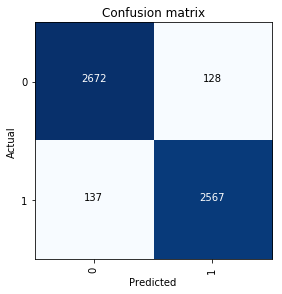

In [58]:
interp.plot_confusion_matrix()

In [59]:
learn.unfreeze()

In [60]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.141186,0.116783,0.039426


In [61]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


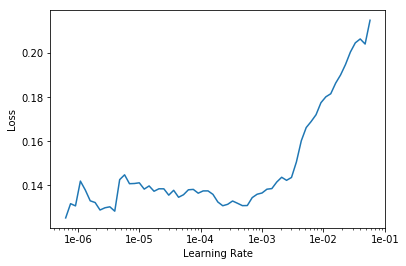

In [62]:
learn.recorder.plot()

In [63]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.118870,0.104693,0.037427
2,0.108816,0.105676,0.039426


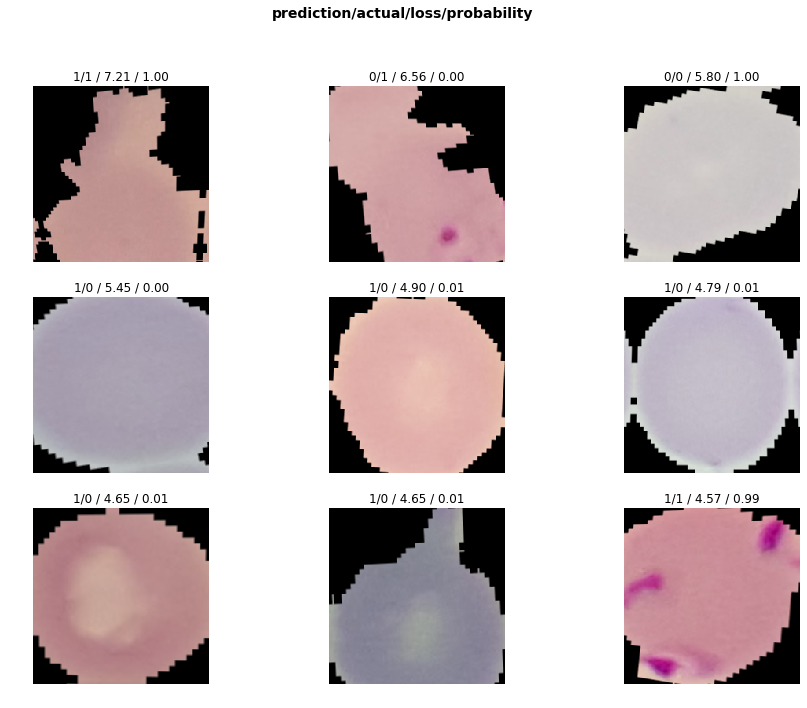

In [57]:
interp.plot_top_losses(9,figsize=(15,11))

In [ ]:
from torch.utils.data.dataset import Dataset
from torchvision import transforms

class MyCustomDataset(Dataset):
    def __init__(self, ..., transforms=None):
        # stuff
        ...
        self.transforms = transforms
        
    def __getitem__(self, index):
        # stuff
        ...
        data = # Some data read from a file or image
        if self.transforms is not None:
            data = self.transforms(data)
        # If the transform variable is not empty
        # then it applies the operations in the transforms with the order that it is created.
        return (img, label)

    def __len__(self):
        return count # of how many data(images?) you have
    
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
])
dataset = ImdbWikiDataset(transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=1)

In [43]:
data.valid_ds

LabelList
y: CategoryList (5512 items)
[Category 0, Category 1, Category 1, Category 0, Category 1]...
Path: ../vision/MalariaCellImages_FlyAI/data/local/test
x: ImageItemList (5512 items)
[Image (3, 103, 145), Image (3, 151, 136), Image (3, 127, 118), Image (3, 148, 127), Image (3, 118, 103)]...
Path: ../vision/MalariaCellImages_FlyAI/data/local/test

In [28]:
?DataLoader

In [24]:
data.valid_ds

LabelList
y: CategoryList (3306 items)
[Category 0, Category 0, Category 0, Category 1, Category 0]...
Path: ../vision/MalariaCellImages_FlyAI/data/local/train
x: ImageItemList (3306 items)
[Image (3, 154, 124), Image (3, 124, 109), Image (3, 127, 112), Image (3, 148, 148), Image (3, 109, 106)]...
Path: ../vision/MalariaCellImages_FlyAI/data/local/train

In [20]:
?ImageDataBunch.from_df